STOCK DATASET DATA EXPLORATORY ANALYSIS FROM YAHOO FINANCE

In [85]:
#Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import date
import pandas_datareader as data
from pandas_datareader import *
import math
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [86]:
#Scraping Dataset from Yahoo Finance
START = '2012-01-01'
END = date.today().strftime("%Y-%m-%d")
stock_dataset = data.DataReader('AAPL', 'yahoo', START, END)



In [87]:
#Latest Stock Data
stock_dataset.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-18,164.479996,159.759995,160.509995,163.979996,123351200.0,163.979996
2022-03-21,166.350006,163.009995,163.509995,165.380005,95811400.0,165.380005
2022-03-22,169.419998,164.910004,165.509995,168.820007,81532000.0,168.820007
2022-03-23,172.639999,167.649994,167.990005,170.210007,97965700.0,170.210007
2022-03-24,172.350006,170.210007,171.059998,171.910004,30839379.0,171.910004


In [88]:
#Start of the dataset
stock_dataset.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575918
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643503
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783867
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917511
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897020


In [89]:
#Shape of Dataset
stock_dataset.shape

(2574, 6)

In [90]:
#Info Dataset
stock_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2574 entries, 2012-01-03 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2574 non-null   float64
 1   Low        2574 non-null   float64
 2   Open       2574 non-null   float64
 3   Close      2574 non-null   float64
 4   Volume     2574 non-null   float64
 5   Adj Close  2574 non-null   float64
dtypes: float64(6)
memory usage: 140.8 KB


In [91]:
#Describe Dataset
stock_dataset.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2574.000000,2574.000000,2574.000000,2574.000000,2.574000e+03,2574.000000
mean,52.187347,51.098482,51.636792,51.665508,2.124156e+08,49.884114
std,42.572299,41.552044,42.052939,42.088885,1.748379e+08,42.723146
min,14.271429,13.753571,13.856071,13.947500,3.083938e+07,12.119167
25%,23.989375,23.526250,23.757232,23.756965,1.014306e+08,21.463580
50%,33.703749,33.250000,33.491251,33.538750,1.485122e+08,31.665941
75%,56.186251,54.954999,55.631251,55.765624,2.610347e+08,54.157786
max,182.940002,179.119995,182.630005,182.009995,1.506120e+09,181.778397


In [92]:
#Checking for Null Values
stock_dataset.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

<AxesSubplot:>

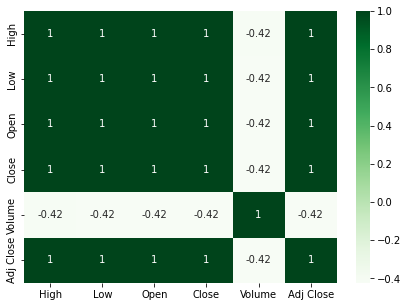

In [93]:
#Plottin Heat Map
plt.figure(figsize=(7,5))
sns.heatmap(stock_dataset.corr(),cmap='Greens',annot=True)

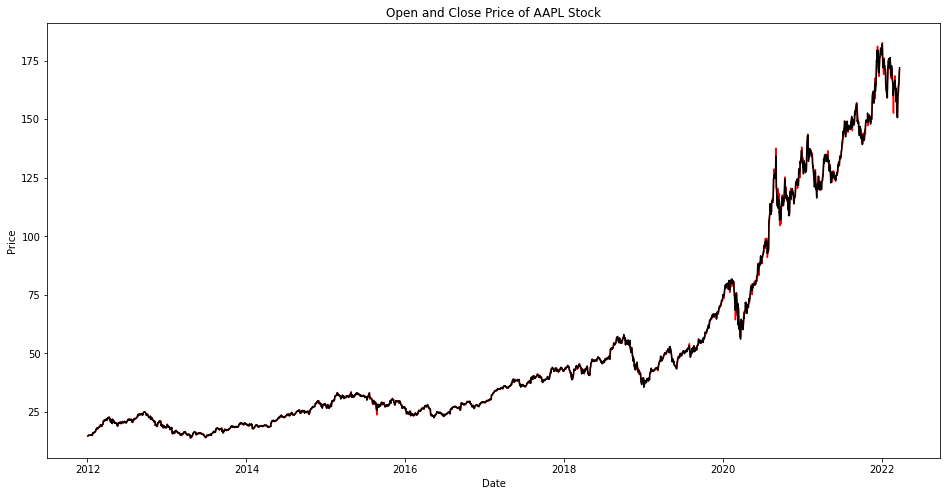

In [94]:
#Plotting Open and Closing Prices of AAPL Stock
plt.figure(figsize=(16,8))
plt.title("Open and Close Price of AAPL Stock")
plt.plot(stock_dataset['Open'], 'red')
plt.plot(stock_dataset['Close'], 'black')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

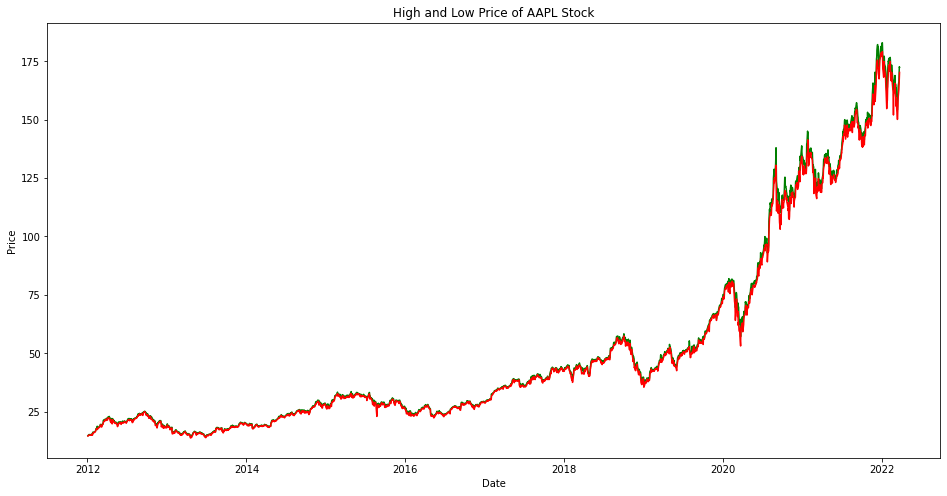

In [95]:
#Plotting High and Low Price Prices
plt.figure(figsize=(16,8))
plt.title("High and Low Price of AAPL Stock")
plt.plot(stock_dataset['High'], 'green')
plt.plot(stock_dataset['Low'], 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

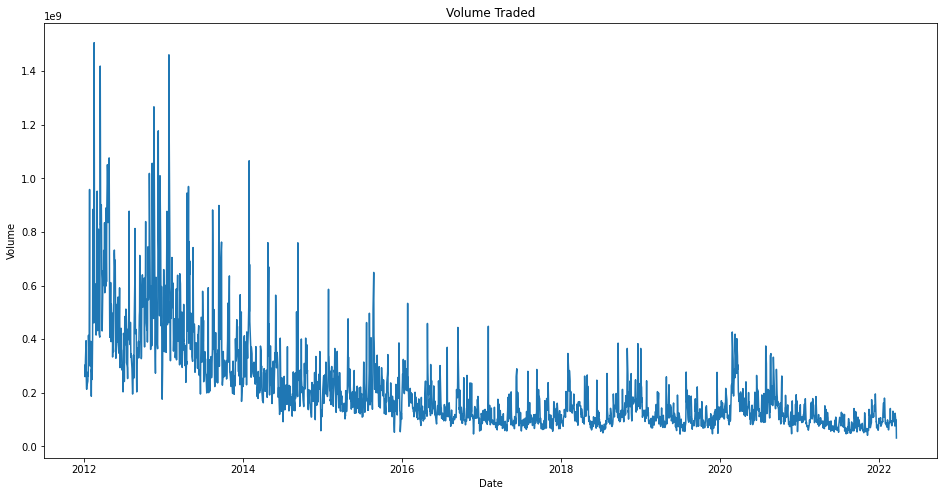

In [96]:
#Plotting Total Volume of HSBC being traded
plt.figure(figsize=(16, 8))
plt.title("Volume Traded")
plt.plot(stock_dataset['Volume'])
plt.ylabel('Volume')
plt.xlabel('Date')
plt.show()


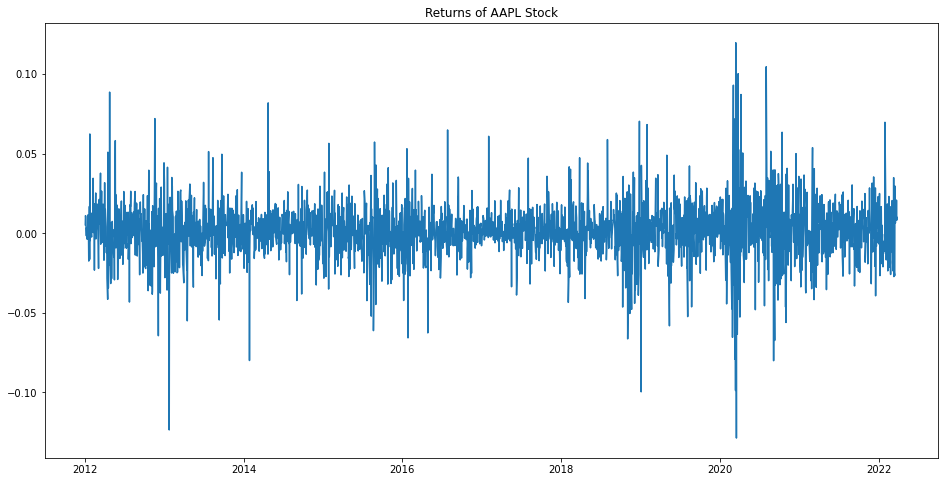

In [97]:
#Plotting Return on Average of AAPL Stock
stock_dataset['Daily Return'] = stock_dataset['Adj Close'].pct_change()
plt.figure(figsize=(16, 8))
plt.title("Returns of AAPL Stock")
plt.plot(stock_dataset['Daily Return'])
plt.show()


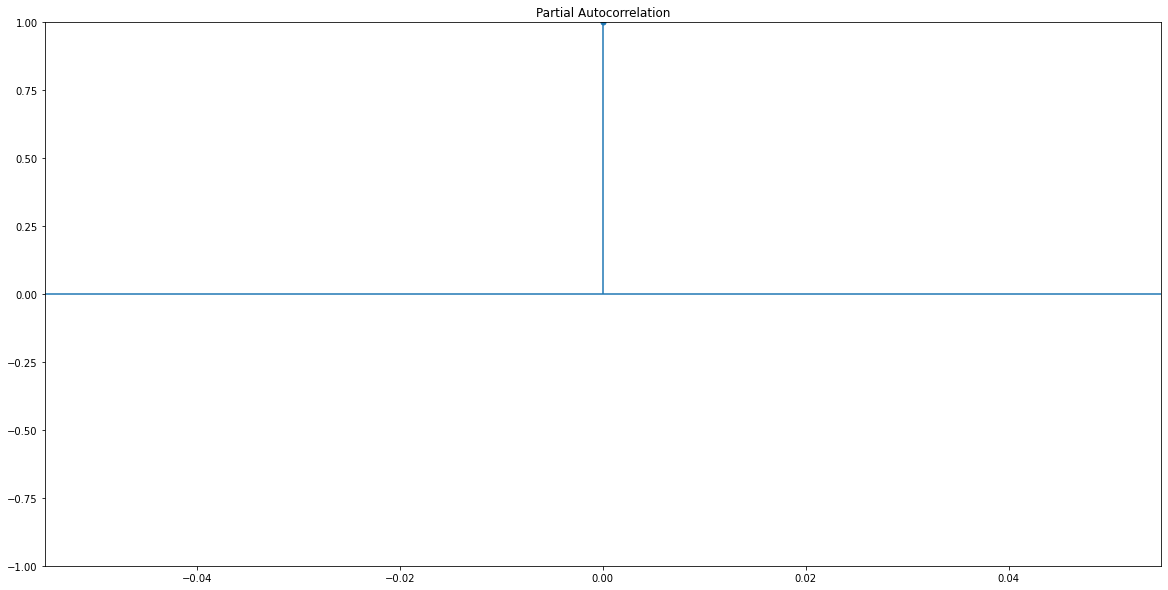

In [98]:
#Plotting PACF Graph
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
prices = stock_dataset.Close
returns = stock_dataset['Adj Close'].pct_change()
plot_pacf(returns)
plt.show()

C:\Users\RAHUL\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\axes\_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


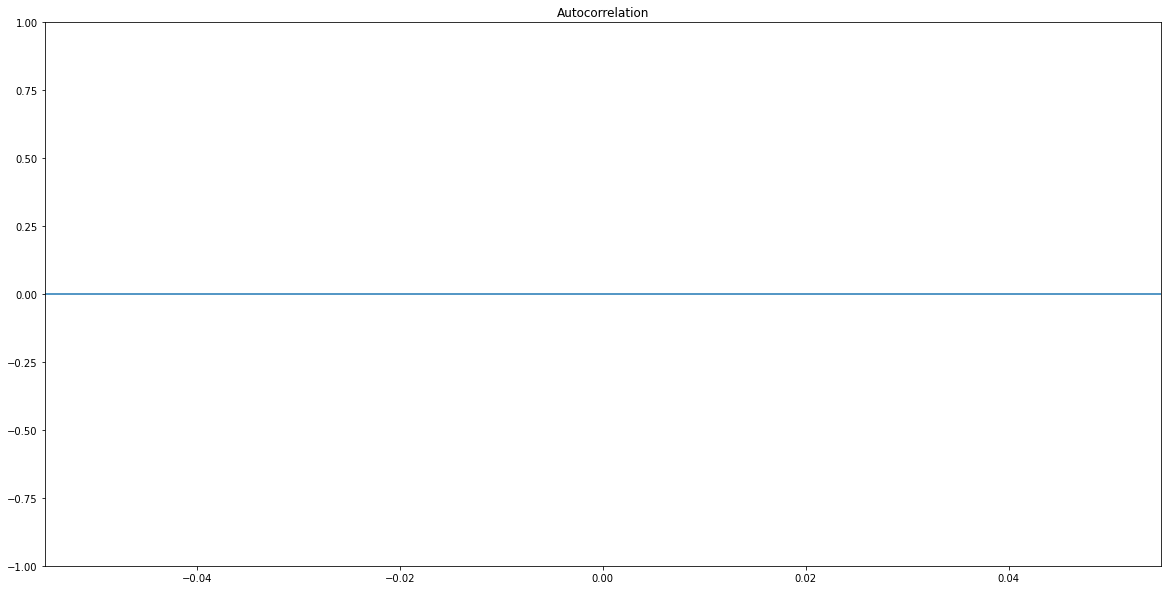

In [99]:
#Plotting ACF Graph
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(returns)
plt.show()

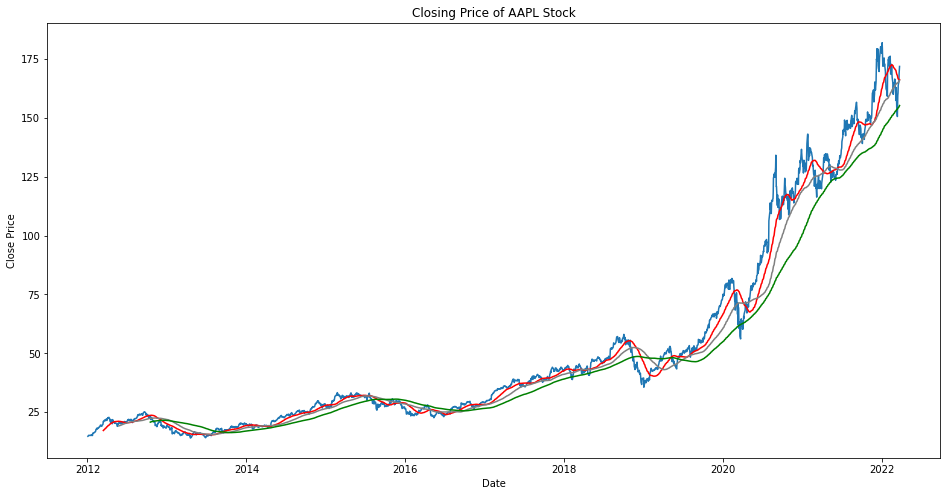

In [100]:
#Moving Average of 50 Days, 100 Days and 200 days
moving_average_50 = stock_dataset.Close.rolling(50).mean()
moving_average_100 = stock_dataset.Close.rolling(100).mean()
moving_average_200 = stock_dataset.Close.rolling(200).mean()


#Plotting 5/100/200 Days Moving Average
plt.figure(figsize=(16,8))
plt.title("Closing Price of AAPL Stock")
plt.plot(stock_dataset['Close'])
plt.plot(moving_average_50, 'red')
plt.plot(moving_average_100, 'grey')
plt.plot(moving_average_200, 'green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [101]:
#Looking at stock prices back 1 Year
START = '2021-01-01'
END = date.today().strftime("%Y-%m-%d")
stock_dataset = data.DataReader('AAPL', 'yahoo', START, END)
prices = stock_dataset.Close
print(prices)

Date
2021-01-04    129.410004
2021-01-05    131.009995
2021-01-06    126.599998
2021-01-07    130.919998
2021-01-08    132.050003
                 ...    
2022-03-18    163.979996
2022-03-21    165.380005
2022-03-22    168.820007
2022-03-23    170.210007
2022-03-24    171.940002
Name: Close, Length: 309, dtype: float64


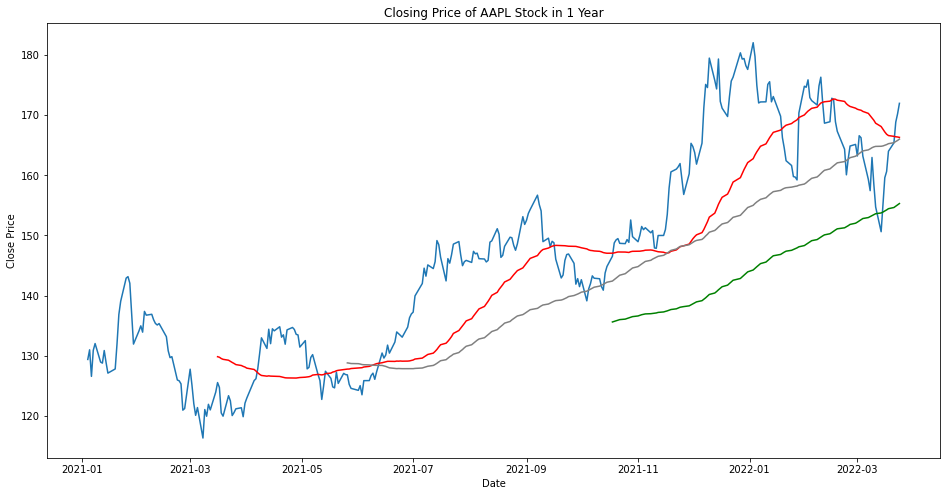

In [102]:
#Moving Average of 50 Days, 100 Days and 200 days

moving_average_50 = stock_dataset.Close.rolling(50).mean()
moving_average_100 = stock_dataset.Close.rolling(100).mean()
moving_average_200 = stock_dataset.Close.rolling(200).mean()


#Plotting 5/100/200 Days Moving Average
plt.figure(figsize=(16,8))
plt.title("Closing Price of AAPL Stock in 1 Year")
plt.plot(stock_dataset['Close'])
plt.plot(moving_average_50, 'red')
plt.plot(moving_average_100, 'grey')
plt.plot(moving_average_200, 'green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

Text(0, 0.5, 'Returns')

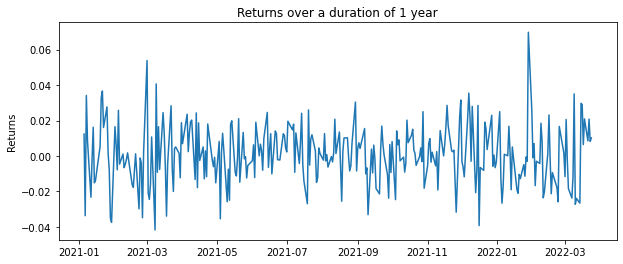

In [103]:
#Plotting Returns over a year
returns = prices.pct_change()
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.title("Returns over a duration of 1 year")
plt.ylabel('Returns')

In [104]:
#Scraping Dataset from Yahoo Finance
START = '2013-01-01'
END = date.today().strftime("%Y-%m-%d")
stock_dataset = data.DataReader('AAPL', 'yahoo', START, END)

In [105]:
#New Variables for Heat Map
stock_dataset['Open-High'] = stock_dataset['Open']-stock_dataset['High']
stock_dataset['Open-Low'] = stock_dataset['Open'] - stock_dataset['Low']
stock_dataset['Close-High'] = stock_dataset['Close']-stock_dataset['High']
stock_dataset['Close-Low'] = stock_dataset['Close'] - stock_dataset['Low']
stock_dataset['High-Low'] = stock_dataset['High'] - stock_dataset['Low']
stock_dataset['Open-Close'] = stock_dataset['Open'] - stock_dataset['Close']
stock_dataset.head()

,High,Low,Open,Close,Volume,Adj Close,Open-High,Open-Low,Close-High,Close-Low,High-Low,Open-Close
Date,,,,,,,,,,,,
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,16.939114,-0.042143,0.435356,-0.213215,0.264284,0.477499,0.171072
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.725306,-0.063929,0.245714,-0.270357,0.039286,0.309643,0.206429
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.259426,-0.059286,0.397858,-0.415358,0.041786,0.457144,0.356071
2013-01-07,18.903570,18.400000,18.642857,18.710714,484156400.0,16.163784,-0.260714,0.242857,-0.192856,0.310715,0.503571,-0.067858
2013-01-08,18.996071,18.616072,18.900356,18.761070,458707200.0,16.207287,-0.095715,0.284285,-0.235001,0.144999,0.379999,0.139286


<AxesSubplot:>

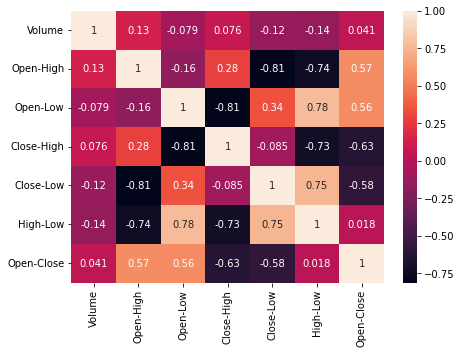

In [106]:
updated_dataset = stock_dataset.copy()
updated_dataset = updated_dataset.drop(['Open','High','Low','Close', 'Adj Close'],axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(updated_dataset.corr(),annot=True)

In [107]:
#Scraping Dataset from Yahoo Finance
START = '2013-01-01'
END = date.today().strftime("%Y-%m-%d")
stock_dataset = data.DataReader('AAPL', 'yahoo', START, END)

In [108]:
#Relative Strength Index
def rsi(stock_dataset, window=14):
    close = stock_dataset['Close']
    
    # Price increase or decrease over previous day
    dif = close.diff()
    dif = dif[1:] 
    
    # pos_m identifies stock price going up
    # neg_m udentifies stock price going down
    pos_m, neg_m = dif.copy(), dif.copy()
    pos_m[pos_m < 0] = 0
    neg_m[neg_m > 0] = 0
    
    # Positive Rolling Mean Exponential
    prme = pos_m.ewm(span=window).mean()
    # Negative Rolling Mean Exponential
    nrme = neg_m.abs().ewm(span=window).mean()
    
    # Ratio of magnitude of up move to down move
    RSE = prme / nrme
    RSIE = 100.0 - (100.0 / (1.0 + RSE))
    stock_dataset['rsie'] = RSIE
    
    # Positive Rolling Mean Simple
    prms = pos_m.rolling(window).mean()
    # Negative Rolling Mean Simple
    nrms = neg_m.abs().rolling(window).mean()

    RSS = prms / nrms
    RSIS = 100.0 - (100.0 / (1.0 + RSS))
    
    stock_dataset['rsis'] = RSIS
    return stock_dataset

stock_dataset = rsi(stock_dataset)


In [110]:
stock_dataset.tail(14)

,High,Low,Open,Close,Volume,Adj Close,rsie,rsis
Date,,,,,,,,
2022-03-07,165.020004,159.039993,163.360001,159.300003,96418800.0,159.300003,31.538422,36.002317
2022-03-08,162.880005,155.800003,158.820007,157.440002,131148300.0,157.440002,28.221845,26.142359
2022-03-09,163.410004,159.410004,161.479996,162.949997,91454900.0,162.949997,47.200513,37.179469
2022-03-10,160.389999,155.979996,160.199997,158.520004,105342000.0,158.520004,37.903344,36.439778
2022-03-11,159.279999,154.500000,158.929993,154.729996,96836300.0,154.729996,31.733109,34.446900
2022-03-14,154.119995,150.100006,151.449997,150.619995,108732100.0,150.619995,26.363149,33.509847
2022-03-15,155.570007,150.380005,150.899994,155.089996,92964300.0,155.089996,39.261548,44.037340
2022-03-16,160.000000,154.460007,157.050003,159.589996,102300200.0,159.589996,49.530427,46.386774
2022-03-17,161.000000,157.630005,158.610001,160.619995,75615400.0,160.619995,51.687624,45.024685


In [113]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")


hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055949,0.064177,0.055949,0.061434,1031788800,0.0,0.0
1986-03-14,0.061434,0.064725,0.061434,0.063628,308160000,0.0,0.0
1986-03-17,0.063628,0.065274,0.063628,0.064725,133171200,0.0,0.0
1986-03-18,0.064725,0.065274,0.062531,0.063079,67766400,0.0,0.0
1986-03-19,0.063079,0.063628,0.061434,0.061982,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2022-03-18,295.369995,301.000000,292.730011,300.429993,43317000,0.0,0.0
2022-03-21,298.890015,300.140015,294.899994,299.160004,28351200,0.0,0.0
2022-03-22,299.799988,305.000000,298.769989,304.059998,27599700,0.0,0.0


In [115]:
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 181000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certifica

REGRESSION MODELS: LSTM, ARIMA & PROPHET.

CLASSIFICATION MODEL: LOGISTIC REGRESSION, DECISION TREE, RANDOM FOREST.